In [289]:
import random

def bernoulli_binary_choice_k_variation(probabilities, k=1):
    sorted_probs = sorted(probabilities, reverse=True)

    if len(sorted_probs) <= k:
        return sorted_probs

    val = k
    prob_sum = sum(sorted_probs[0:val])
    print(sum(probabilities[0:len(probabilities)//2]),prob_sum)
    total = sum([random.uniform(0,1) for i in range(k-1)]) / (k-1)
    total = (sum(probabilities[0:len(probabilities)//2])+total*(k-1))/k
    print(prob_sum,total)
    if prob_sum > total:
        sorted_probs = sorted_probs[0:val]
        if len(sorted_probs) <= k:
            return sorted_probs
        return bernoulli_binary_choice_k_variation(sorted_probs, k)
    else:
        sorted_probs = sorted_probs[val::]
        if len(sorted_probs) <= k:
            return sorted_probs
        return bernoulli_binary_choice_k_variation(sorted_probs, k)

# Example usage:
probabilities = [random.randint(1, 10000) for i in range(100)]
probabilities = [i / sum(probabilities) for i in probabilities]
k_value = 30

result = bernoulli_binary_choice_k_variation(probabilities, k_value)
print("Bernoulli Binary Choices:", result)



    

0.4939433281322581 0.4945289453728298
0.4945289453728298 0.5303104936107137
0.3804884246300686 0.34164314271988444
0.34164314271988444 0.5072427589199351
0.1242818744516042 0.15589726486971506
0.15589726486971506 0.46078375150348816
Bernoulli Binary Choices: [0.0016397282736003748, 0.0015027533936022804, 0.0013479122249087827, 0.0010044824533193579, 0.0007186218341929003, 0.0005340035176737299, 0.0005240778017318389, 0.0004029840672407701, 0.00018461831651917052, 7.14651547816144e-05]


In [270]:
import random

def bernoulli_binary_choice(probabilities, k=1):
    sorted_probs = sorted(probabilities, reverse=True)

    if len(sorted_probs) <= k:
        return sorted_probs

    val = len(sorted_probs) // 2
    prob_sum = sum(sorted_probs[:val]) /  sum(sorted_probs)
    print(prob_sum)
    x = random.uniform(0,1)
    if prob_sum > x:
        sorted_probs = sorted_probs[:val]
        if len(sorted_probs) <= k:
            return sorted_probs
        return bernoulli_binary_choice(sorted_probs, k)
    else:
        sorted_probs = sorted_probs[val:]
        if len(sorted_probs) <= k:
            return sorted_probs
        return bernoulli_binary_choice(sorted_probs, k)

# Example usage:
probabilities = [random.randint(1, 10000) for i in range(100)]
probabilities = [i / sum(probabilities) for i in probabilities]
k_value = 10

result = bernoulli_binary_choice(probabilities, k_value)
print("Bernoulli Binary Choices:", result)

0.7737549622612578
0.5957634209715067
0.5248650946185689
0.5170765628575955
Bernoulli Binary Choices: [0.020285638832569473, 0.02002368255158196, 0.01961477518613804, 0.019246332612066173, 0.01884807387593069, 0.01882464689145213]


In [271]:
import random

def fast_random_choice(probabilities, k=1):
    cumulative_probs = [sum(probabilities[:i+1]) for i in range(len(probabilities))]
    result = []

    for _ in range(k):
        rand_val = random.uniform(0, 1)
        chosen_index = next(i for i, cumulative_prob in enumerate(cumulative_probs) if rand_val < cumulative_prob)
        result.append(chosen_index)

    return result

# Example usage:
probabilities = [random.randint(1,100) for i in range(100)]
probabilities = [i/sum(probabilities) for i in range(len(probabilities))]
k_value = 2

result = fast_random_choice(probabilities, k_value)
print("Fast Random Choices:", result)


Fast Random Choices: [77, 74]


In [272]:
import random
import time
bernolli_time = []
fast_algo_time = []
for iter in range(5,3000):
    print(iter)
    probabilities = [random.randint(1,10) for i in range(iter+10)]
    probabilities = [i/sum(probabilities) for i in range(len(probabilities))]


    start_time = time.time()
    bernoulli_binary_choice(probabilities,k=iter)
    end_time = time.time()
    bernolli_time.append(end_time-start_time)

    start_time = time.time()
    fast_random_choice(probabilities,k=iter)
    end_time = time.time()
    fast_algo_time.append(end_time-start_time)


5
0.7333333333333333
0.7857142857142857
6
0.7666666666666667
0.7857142857142857
7
0.7352941176470589
0.58
8
0.7647058823529411
0.7222222222222222
9
0.736842105263158
10
0.7631578947368421
11
0.7380952380952381
12
0.7619047619047619
13
0.7391304347826088
14
0.7608695652173914
15
0.7400000000000001
16
0.76
17
0.7407407407407407
18
0.7592592592592593
19
0.7413793103448278
20
0.7586206896551724
21
0.7419354838709677
22
0.7580645161290323
23
0.7424242424242425
24
0.7575757575757578
25
0.7428571428571429
26
0.7571428571428571
27
0.7432432432432433
28
0.7567567567567568
29
0.7435897435897436
30
0.7564102564102565
31
0.7439024390243905
32
0.7560975609756098
33
0.7441860465116279
34
0.7558139534883722
35
0.7444444444444442
36
0.7555555555555556
37
0.7446808510638296
38
0.7553191489361701
39
0.7448979591836736
40
0.7551020408163265
41
0.7450980392156864
42
0.7549019607843138
43
0.7452830188679247
44
0.7547169811320755
45
0.7454545454545454
46
0.7545454545454547
47
0.7456140350877193
48
0.7543859

KeyboardInterrupt: 

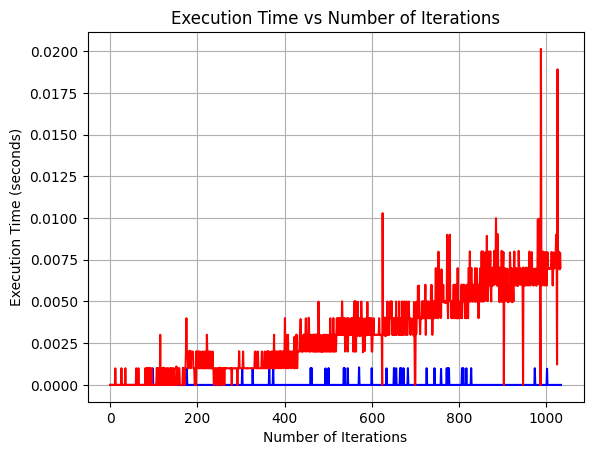

In [273]:
import matplotlib.pyplot as plt
plt.plot([i for i in range(len(bernolli_time))], bernolli_time, linestyle='-', color='b',label="values")
plt.plot([i for i in range(len(fast_algo_time))], fast_algo_time, linestyle='-', color='r',label="values")
plt.xlabel('Number of Iterations')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time vs Number of Iterations')
plt.grid(True)
plt.show()

In [279]:
import random
import time
bernolli_time = []
bernolli_time_k_variation = []
for iter in range(5,10000):
    print(iter)
    probabilities = [random.randint(1,iter) for i in range(iter+10)]
    probabilities = [i/sum(probabilities) for i in range(len(probabilities))]


    start_time = time.time()
    bernoulli_binary_choice_k_variation(probabilities,k=iter)
    end_time = time.time()
    bernolli_time_k_variation.append(end_time-start_time)

    start_time = time.time()
    bernoulli_binary_choice(probabilities,k=iter)
    end_time = time.time()
    bernolli_time.append(end_time-start_time)

5
0.5121951219512195 1.4634146341463414
0.7333333333333332
0.5064935064935066
6
0.4375 1.171875
0.7666666666666667
0.5869565217391305
7
0.4117647058823529 1.338235294117647
0.7352941176470589
0.5800000000000001
8
0.4235294117647059 1.2705882352941176
0.7647058823529411
0.7222222222222222
9
0.5 1.75
0.7368421052631579
10
0.4285714285714286 1.380952380952381
0.7631578947368421
11
0.39473684210526316 1.4473684210526316
0.7380952380952381
12
0.4263565891472868 1.441860465116279
0.7619047619047619
13
0.3900709219858156 1.475177304964539
0.7391304347826086
14
0.35106382978723405 1.228723404255319
0.7608695652173914
15
0.31578947368421056 1.2200956937799043
0.74
16
0.32231404958677684 1.15702479338843
0.7599999999999999
17
0.3277310924369748 1.2857142857142858
0.7407407407407407
18
0.3063973063973064 1.121212121212121
0.7592592592592592
19
0.2861635220125786 1.1352201257861636
0.7413793103448272
20
0.330188679245283 1.2264150943396228
0.758620689655172
21
0.3201219512195122 1.2804878048780488

KeyboardInterrupt: 

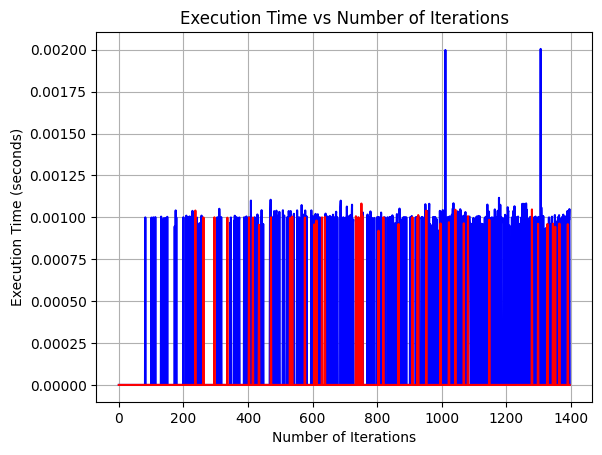

In [280]:
import matplotlib.pyplot as plt
plt.plot([i for i in range(len(bernolli_time_k_variation))], bernolli_time_k_variation, linestyle='-', color='b',label="values")
plt.plot([i for i in range(len(bernolli_time))], bernolli_time, linestyle='-', color='r',label="values")
plt.xlabel('Number of Iterations')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time vs Number of Iterations')
plt.grid(True)
plt.show()

In [281]:
sum_of_values_bernolli = []
sum_of_random_choice = []
expected_returns = []
for iter in range(5,1000):
    print(iter)
    probabilities = [random.randint(1,iter) for i in range(iter+10)]
    probabilities = [i/sum(probabilities) for i in range(len(probabilities))]
    bern_val = sum(bernoulli_binary_choice_k_variation(probabilities,iter))
    random_val = sum(random.choices(probabilities,weights=None, cum_weights=None, k=iter))
    sum_of_values_bernolli.append(bern_val)
    sum_of_random_choice.append(random_val)
    expected_returns.append(iter/len(probabilities))

5
0.525 1.5
6
0.39436619718309857 1.056338028169014
7
0.4375 1.421875
8
0.45569620253164556 1.3670886075949367
9
0.3243243243243243 1.135135135135135
10
0.4205607476635514 1.3551401869158877
11
0.2884615384615385 1.0576923076923077
12
0.4166666666666667 1.4090909090909087
13
0.3503184713375796 1.3248407643312101
14
0.43137254901960786 1.5098039215686274
15
0.32352941176470595 1.25
16
0.32365145228215764 1.161825726141079
17
0.30830039525691705 1.2094861660079048
18
0.364 1.332
19
0.3116438356164384 1.2363013698630136
20
0.36971830985915494 1.3732394366197183
21
0.32307692307692304 1.2923076923076922
22
0.31413612565445026 1.1806282722513088
23
0.27777777777777773 1.1180555555555554
24
0.32075471698113206 1.2169811320754718
25
0.27037773359840955 1.0934393638170974
26
0.31160896130346233 1.1914460285132384
27
0.3103448275862069 1.2596348884381339
28
0.29895104895104896 1.1503496503496502
29
0.33928571428571425 1.380952380952381
30
0.32094594594594594 1.2415540540540542
31
0.272596843615

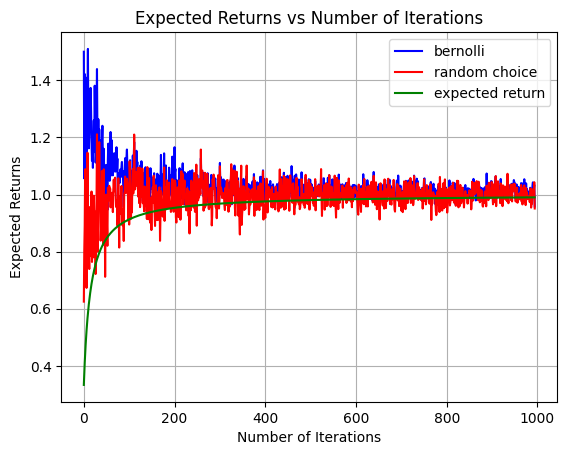

In [282]:
import matplotlib.pyplot as plt
plt.plot([i for i in range(len(sum_of_values_bernolli))], sum_of_values_bernolli, linestyle='-', color='b',label="bernolli")
plt.plot([i for i in range(len(sum_of_random_choice))], sum_of_random_choice, linestyle='-', color='r',label="random choice")
plt.plot([i for i in range(len(expected_returns))], expected_returns, linestyle='-', color='g',label="expected return")
plt.xlabel('Number of Iterations')
plt.ylabel('Expected Returns')
plt.title('Expected Returns vs Number of Iterations')
plt.grid(True)
plt.legend()
plt.show()

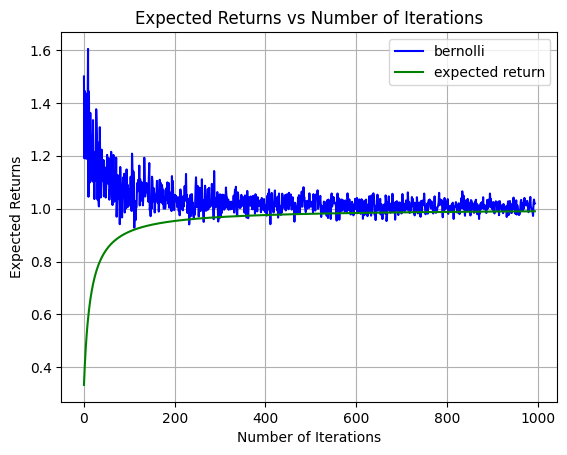

In [267]:
import matplotlib.pyplot as plt
plt.plot([i for i in range(len(sum_of_values_bernolli))], sum_of_values_bernolli, linestyle='-', color='b',label="bernolli")
plt.plot([i for i in range(len(expected_returns))], expected_returns, linestyle='-', color='g',label="expected return")
plt.xlabel('Number of Iterations')
plt.ylabel('Expected Returns')
plt.title('Expected Returns vs Number of Iterations')
plt.grid(True)
plt.legend()
plt.show()

In [268]:
for i in sum_of_values_bernolli:
    if i < 0.3:
        print(i)